In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from uncertainties import ufloat, unumpy

## Beam Diameter

### P(x) vs. x Graph

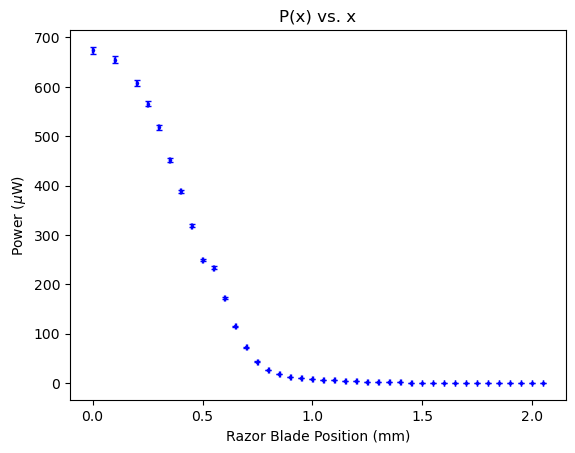

In [28]:
power = np.array([674, 655, 607, 566, 518, 452, 388, 319, 249, 234, 173, 115, 72.6, 43.6, 26.9, 18.0, 13.0, 10.2, 7.97, 6.48, 5.33, 4.47, 3.51, 2.76, 2.25, 1.87, 1.51, 1.13, 
                0.90, 0.79, 0.66, 0.58, 0.51, 0.47, 0.46, 0.44, 0.41, 0.40, 0.38, 0.36])
position_1 = np.arange(0,0.30,0.10)
position_2 = np.arange(0.25,2.10,0.05)
position = np.append(position_1, position_2)
power_err = power * 0.01
position_err = np.full(40, 0.001)

plt.title(r"P(x) vs. x")
plt.xlabel(r"Razor Blade Position (mm)")
plt.ylabel(r"Power ($\mu$W)")
plt.errorbar(position, power, power_err, position_err, 
            color = 'blue', marker = '.', markersize = 3, 
            markerfacecolor = 'None', linestyle = 'None', 
            ecolor = "blue", elinewidth=1, capsize=2)
plt.show()



### Beam Diameter

In [26]:
R_max = unumpy.uarray(position[np.argmax(power)], position_err[np.argmax(power)]) #Get razor blade position when the power is at its maximum and its uncertainty
R_min = unumpy.uarray(position[np.argmin(power)], position_err[np.argmin(power)]) #Get razor blade position when the power is at its minimum and its uncertainty
R_actual = 0.80

R = np.abs((R_max - R_min)) / 2 #Beam Diameter Formula
Perc_err = (np.abs(R_actual - R.n) / R_actual) * 100

print("The observed beam diameter is", R)
print("The actual beam diameter is", R_actual)
print("The Percent Error is {:.2f}%".format(Perc_err))

The observed beam diameter is 1.0250+/-0.0007
The actual beam diameter is 0.8
The Percent Error is 28.12%


### Total Beam Power

In [27]:
P_max = unumpy.uarray(np.max(power), np.max(power_err))
P_min = unumpy.uarray(np.min(power), np.min(power_err))

P_total = P_max - P_min
print("The total beam power is", P_total)

The total beam power is 674+/-7


### Intensity Equation 

In [20]:
I_o = (2 / (np.pi * (R)**2)) * P_total

print("I = ({}) * e^((x^2 + y^2)/({})^2)".format(I_o, R))

I = (408+/-4) * e^((x^2 + y^2)/(1.0250+/-0.0007)^2)
